# Gridworld Animation Example
### Richard M. Murray, 17 Feb 2020
This notebook contains an example of a gridworld in which an agent move around a randomly generated gridworld and repeatedly visits two goal positions.  The resulting controller is visualized via animation.

Note: because the gridworld is generated randomly, the solution is not always realizeable.

In [12]:
%matplotlib inline
from IPython.display import HTML

import sys
import numpy as np
import tulip.gridworld as gw
from tulip import synth
from tulip.transys import machines

In [13]:
# Set the size of the gridworld
(height, width) = (5, 10)

# Create the gridworld
Z = gw.random_world((height, width), wall_density=0.2,
                    num_init=1, num_goals=2)
print(Z)

   0 1 2 3 4 5 6 7 8 9
  ---------------------
 0| | | | | | |G| | | |
  ---------------------
 1| | | | |G|*| |*|*| |
  ---------------------
 2| | | | | | |I|*| | |
  ---------------------
 3| |*| | | |*| | | |*|
  ---------------------
 4| |*| |*| | |*| | | |
  ---------------------



In [14]:
# Create a system specification
spc = Z.spec()
spc.moore = False
spc.qinit = r'\A \E'
print(spc.pretty())

ENVIRONMENT VARIABLES:
	(none)

SYSTEM VARIABLES:
	Y_r	(0, 4)
	Y_c	(0, 9)

FORMULA:
ASSUMPTION:
GUARANTEE:
    INITIAL
	  (((Y_r = 2) && (Y_c = 6)))
    SAFETY
	  [](((Y_r = 0) && (Y_c = 0)) -> (((X (Y_r = 0)) && (X (Y_c = 0))) || ((X (Y_r = 1)) && (X (Y_c = 0))) || ((X (Y_r = 0)) && (X (Y_c = 1)))))
	& [](((Y_r = 0) && (Y_c = 1)) -> (((X (Y_r = 0)) && (X (Y_c = 1))) || ((X (Y_r = 0)) && (X (Y_c = 0))) || ((X (Y_r = 1)) && (X (Y_c = 1))) || ((X (Y_r = 0)) && (X (Y_c = 2)))))
	& [](((Y_r = 0) && (Y_c = 2)) -> (((X (Y_r = 0)) && (X (Y_c = 2))) || ((X (Y_r = 0)) && (X (Y_c = 1))) || ((X (Y_r = 1)) && (X (Y_c = 2))) || ((X (Y_r = 0)) && (X (Y_c = 3)))))
	& [](((Y_r = 0) && (Y_c = 3)) -> (((X (Y_r = 0)) && (X (Y_c = 3))) || ((X (Y_r = 0)) && (X (Y_c = 2))) || ((X (Y_r = 1)) && (X (Y_c = 3))) || ((X (Y_r = 0)) && (X (Y_c = 4)))))
	& [](((Y_r = 0) && (Y_c = 4)) -> (((X (Y_r = 0)) && (X (Y_c = 4))) || ((X (Y_r = 0)) && (X (Y_c = 3))) || ((X (Y_r = 1)) && (X (Y_c = 4))) || ((X (Y_r = 0)) && (X 

In [15]:
# Generate a controller
if not synth.is_realizable(spc, solver='omega'):
    print("Not realizable.")
else:
    ctrl = synth.synthesize(spc, solver='omega')

removed 0 nodes from 11 total


move from
	 state: Sinit
	 with input:{}
	 to state: 0
	 reacting by producing output: {'Y_r': 2, 'Y_c': 6}
move from
	 state: 0
	 with input:{}
	 to state: 1
	 reacting by producing output: {'Y_r': 2, 'Y_c': 5}
move from
	 state: 1
	 with input:{}
	 to state: 2
	 reacting by producing output: {'Y_r': 2, 'Y_c': 4}
move from
	 state: 2
	 with input:{}
	 to state: 3
	 reacting by producing output: {'Y_r': 1, 'Y_c': 4}
move from
	 state: 3
	 with input:{}
	 to state: 4
	 reacting by producing output: {'Y_r': 0, 'Y_c': 4}
move from
	 state: 4
	 with input:{}
	 to state: 5
	 reacting by producing output: {'Y_r': 0, 'Y_c': 5}
move from
	 state: 5
	 with input:{}
	 to state: 6
	 reacting by producing output: {'Y_r': 0, 'Y_c': 6}
move from
	 state: 6
	 with input:{}
	 to state: 7
	 reacting by producing output: {'Y_r': 0, 'Y_c': 6}
move from
	 state: 7
	 with input:{}
	 to state: 8
	 reacting by producing output: {'Y_r': 0, 'Y_c': 5}
move from
	 state: 8
	 with input:{}
	 to state: 9
	 reactin

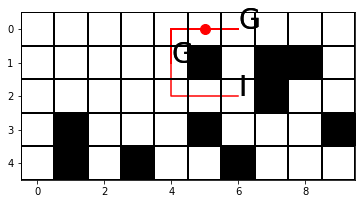

In [16]:
time, states = machines.random_run(ctrl, N=20)
path = np.transpose([states['Y_r'], states['Y_c']])

anim = gw.animate_paths(Z, (path,))
HTML(anim.to_jshtml())